In [67]:
# Import relevant modules
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, precision_score,accuracy_score,f1_score,recall_score

In [68]:
sns.set_theme(style='white', rc={"lines.linewidth": 4})

In [69]:
cal_housing = fetch_california_housing()

X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = pd.DataFrame(cal_housing.target, columns=['MedHouseVal']) # columns=cal_housing.target_names

In [70]:
data = pd.concat([X, y], axis=1)

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [71]:
scaler = StandardScaler()
print(y)
y = scaler.fit_transform(y.values.reshape(-1,1))

print(y)

       MedHouseVal
0            4.526
1            3.585
2            3.521
3            3.413
4            3.422
...            ...
20635        0.781
20636        0.771
20637        0.923
20638        0.847
20639        0.894

[20640 rows x 1 columns]
[[ 2.12963148]
 [ 1.31415614]
 [ 1.25869341]
 ...
 [-0.99274649]
 [-1.05860847]
 [-1.01787803]]


In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=.2)

results_activations = []
results_hidden_1 = []
results_hidden_2 = []
results_alphas = []
results_learning_rates = []
results_r2 = []
results_train_loss = []
results_test_mse = []
results_time_taken = []

activations = ['identity', 'logistic', 'tanh', 'relu']
hidden_1 = [5, 10, 20, 50]
hidden_2 = [5, 10, 20, 50]
alphas = [0.0001, 0.001]
learning_rates = [0.1, 0.01, 0.001]

for activation in activations:
  for h1 in hidden_1:
    for h2 in hidden_2:
      for alpha in alphas:
        for learning_rate in learning_rates:
          results_activations.append(activation)
          results_hidden_1.append(h1)
          results_hidden_2.append(h2)
          results_alphas.append(alpha)
          results_learning_rates.append(learning_rate)

          start = time.time() # start timer
          reg = MLPRegressor(solver='adam', hidden_layer_sizes=(h1, h2), activation=activation, 
                              alpha = alpha, learning_rate_init = learning_rate, max_iter=100000)
          reg.fit(xTrain, yTrain.ravel())
          yPred = reg.predict(xTest)
          print('H1: ',h1, ' H2: ', h2, " ", activation, " ", alpha, " ", learning_rate, ' Time taken: ', round(time.time() - start, 5))
          results_time_taken.append(round(time.time() - start, 5)) # stop timer
          
          results_r2.append(reg.score(xTest, yTest))
          results_train_loss.append(reg.loss_)
          results_test_mse.append(np.square(yTest - yPred).mean())

final_results = pd.DataFrame(np.column_stack([results_activations , results_hidden_1, results_hidden_2, results_alphas, 
                              results_learning_rates, results_r2, results_train_loss, results_test_mse, results_time_taken]), 
                             columns=['Activation', '# of Neurons in hidden unit 1', '# of Neurons in hidden unit 2',
                                      'Alpha', 'Learning Rate', 'R^2', 'Train Loss', 'Test MSE', 'Time Taken'])

final_results

final_results.to_csv('../data/raw/data_assign_reg')

In [ ]:
final_results.astype({'Time Taken': float})['Time Taken'].sum()/60

In [ ]:
final_results.sort_values(by=['Test MSE'], ascending=True).head(20)

final_results = final_results.astype({'Train Loss': float, 'Test MSE': float, 'R^2': float})


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef

print(reg.score(xTest, yTest))

loss = np.square(yTest - yPred).mean()
loss


In [ ]:
final_results_test = final_results
final_results_test = final_results_test.astype({'Train Loss': float, 'Test MSE': float, 'R^2': float, 'Time Taken': float})

cols = ['R^2', 'Train Loss', 'Test MSE', 'Time Taken']
final_results_test[cols] = final_results_test[cols].round(3)
final_results_test


In [51]:
reg_result = pd.read_csv("../data/raw/data_assign_reg")
reg_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     384 non-null    int64  
 1   Activation                     384 non-null    object 
 2   # of Neurons in hidden unit 1  384 non-null    int64  
 3   # of Neurons in hidden unit 2  384 non-null    int64  
 4   Alpha                          384 non-null    float64
 5   Learning Rate                  384 non-null    float64
 6   R^2                            384 non-null    float64
 7   Train Loss                     384 non-null    float64
 8   Test MSE                       384 non-null    float64
 9   Time Taken                     384 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 30.1+ KB


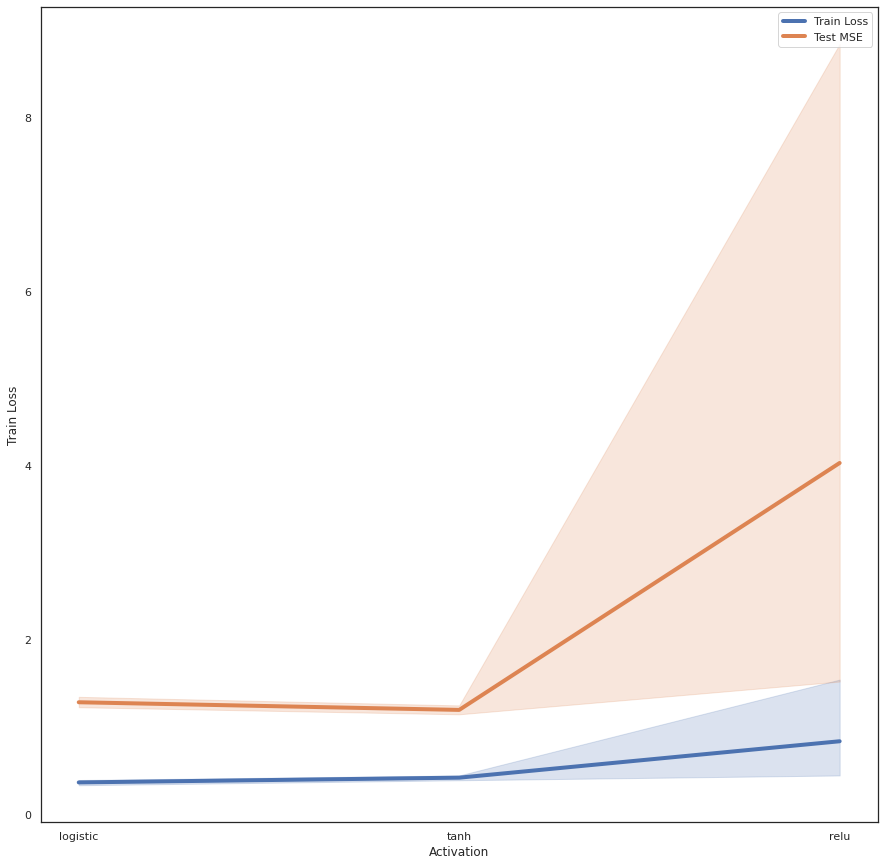

In [53]:
f,ax = plt.subplots(figsize=(15,15))
columns = ['Train Loss', 'Test MSE']

reg_result_no_identity = reg_result[reg_result['Activation'] != 'identity'] 

for i in columns:
  sns.lineplot(data=reg_result_no_identity, x='Activation', y=i, label=i, palette='Set2')

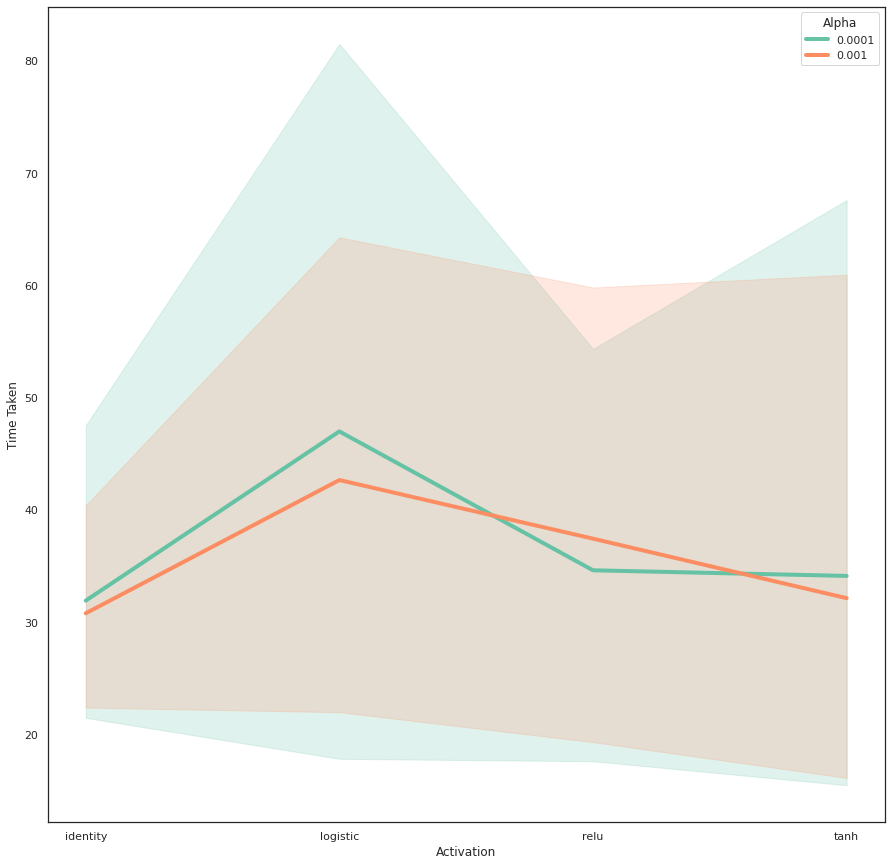

In [54]:
f,ax = plt.subplots(figsize=(15,15))

sum_df = reg_result.groupby(['Activation','Learning Rate','Alpha'])['Time Taken'].sum().reset_index() 
sns.lineplot(data=sum_df, x='Activation', y='Time Taken', hue='Alpha', palette='Set2')

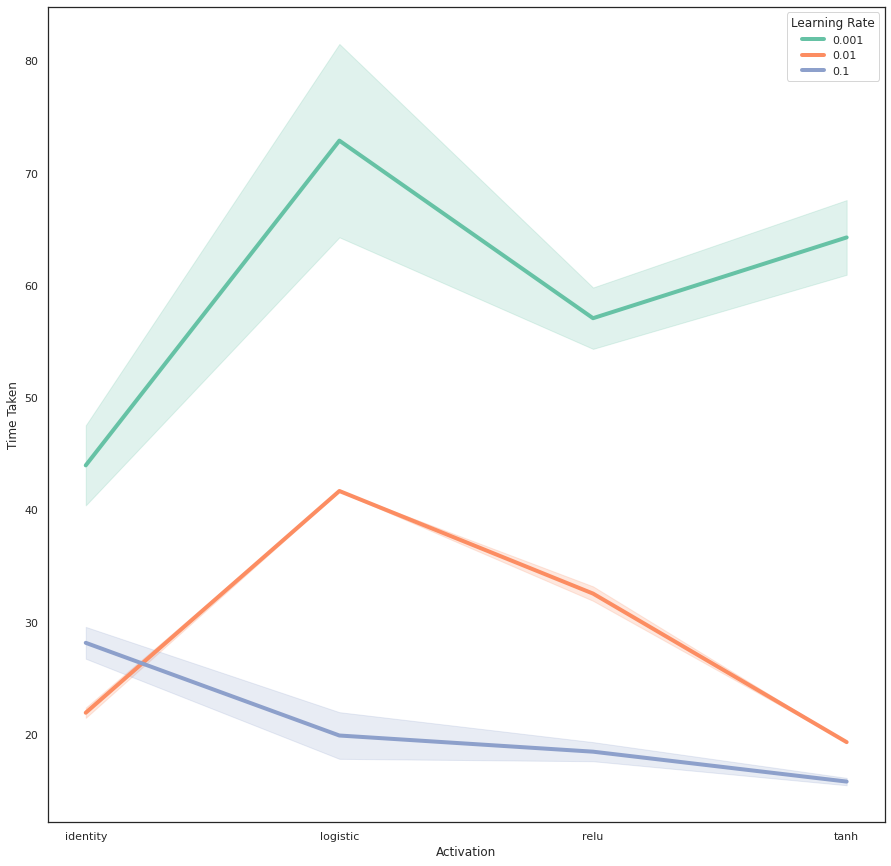

In [55]:
f,ax = plt.subplots(figsize=(15,15))


sns.lineplot(data=sum_df, x='Activation', y='Time Taken', hue='Learning Rate', palette='Set2')

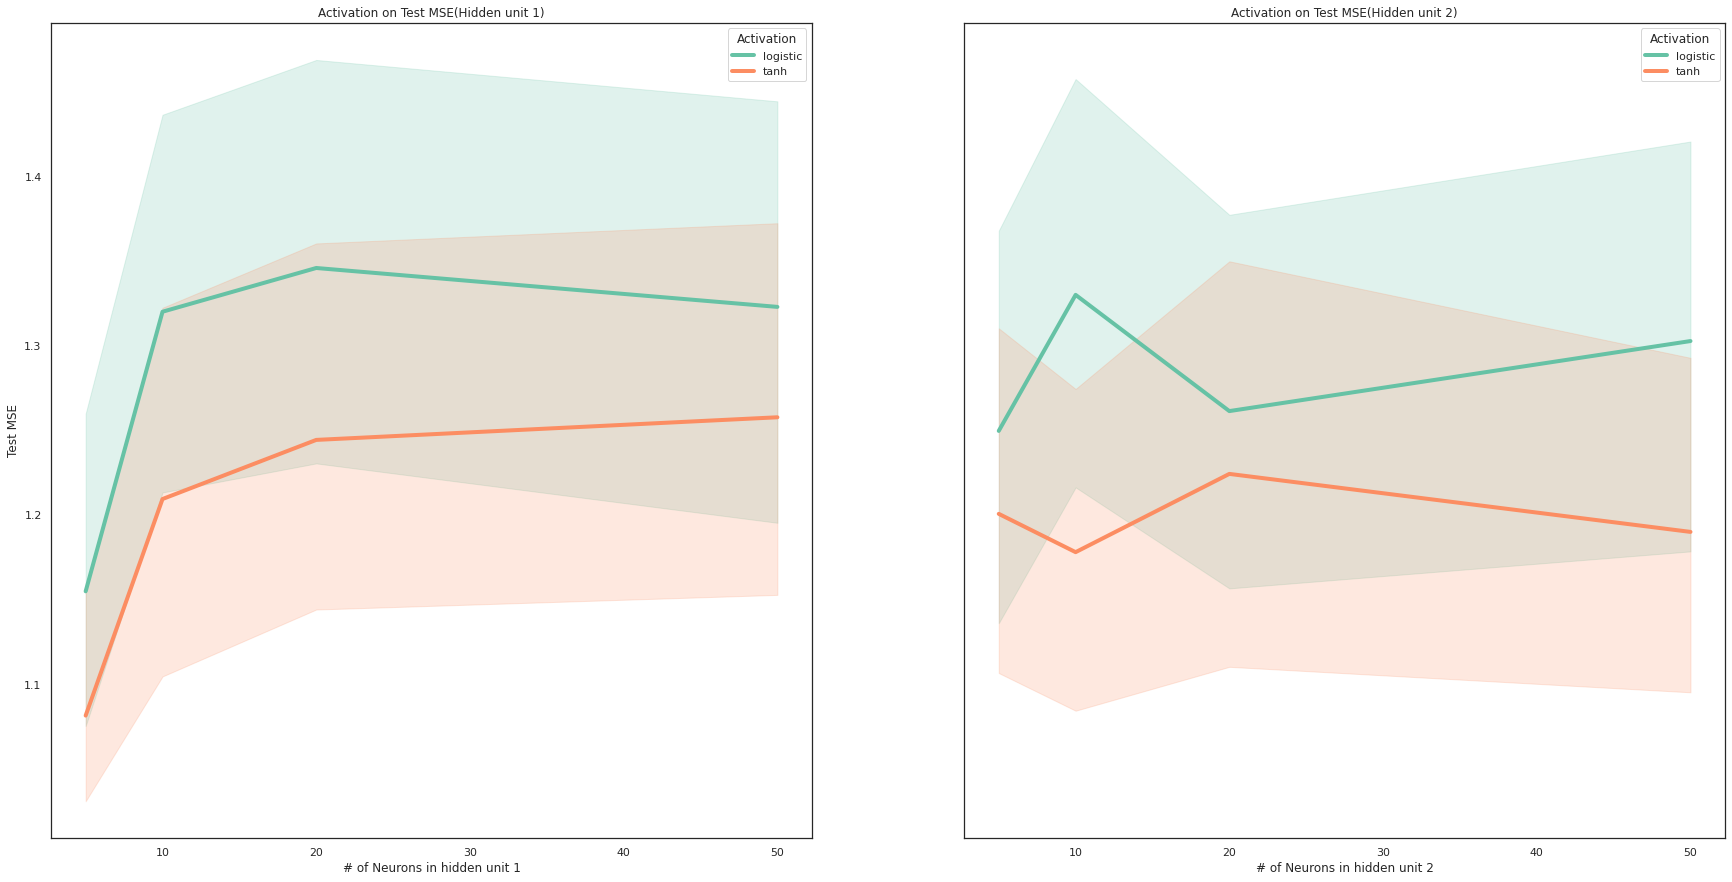

In [87]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30,15), sharey=True)
no_iden_relu = reg_result_no_identity[reg_result_no_identity['Activation'] != 'relu'] 

h1 = sns.lineplot(data=no_iden_relu, x='# of Neurons in hidden unit 1', y='Test MSE', hue='Activation', ax = ax1, palette='Set2')
h2 = sns.lineplot(data=no_iden_relu, x='# of Neurons in hidden unit 2', y='Test MSE', hue='Activation', ax = ax2, palette='Set2')
h1.set_title('Activation on Test MSE(Hidden unit 1)')
h2.set_title('Activation on Test MSE(Hidden unit 2)')
plt.show()

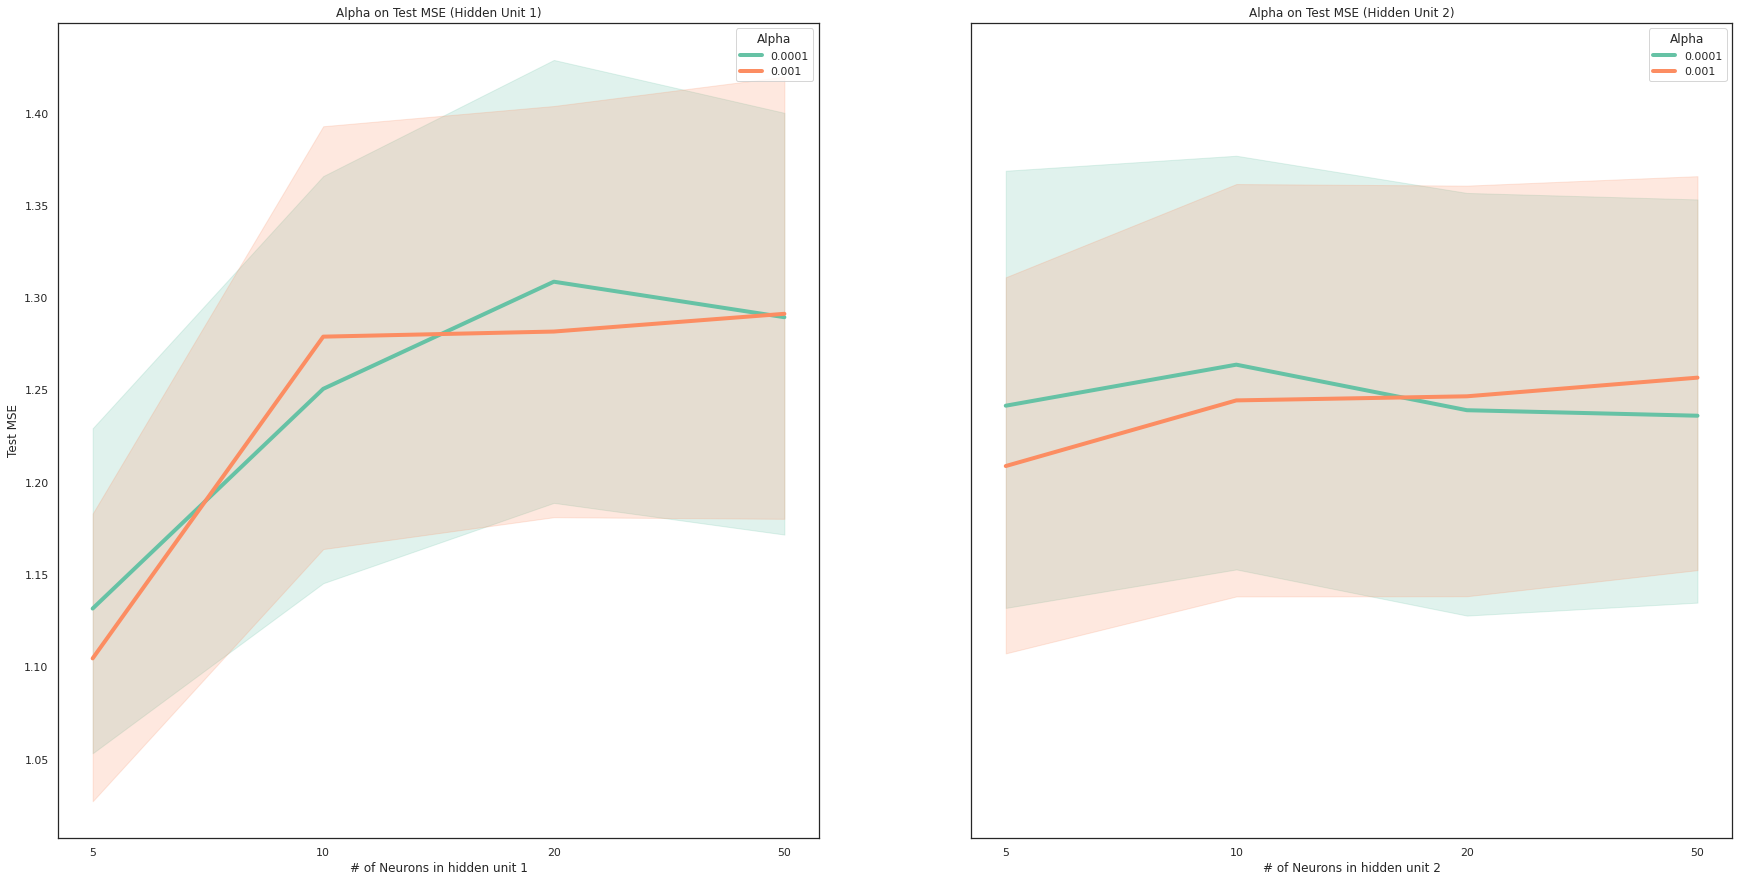

In [84]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30,15), sharey=True)

h1 = sns.lineplot(data=no_iden_relu, x='# of Neurons in hidden unit 1', y='Test MSE', hue='Alpha', ax = ax1, palette='Set2')
h2 = sns.lineplot(data=no_iden_relu, x='# of Neurons in hidden unit 2', y='Test MSE', hue='Alpha', ax = ax2, palette='Set2')
h1.set_title('Alpha on Test MSE (Hidden Unit 1)')
h2.set_title('Alpha on Test MSE (Hidden Unit 2)')
plt.show()

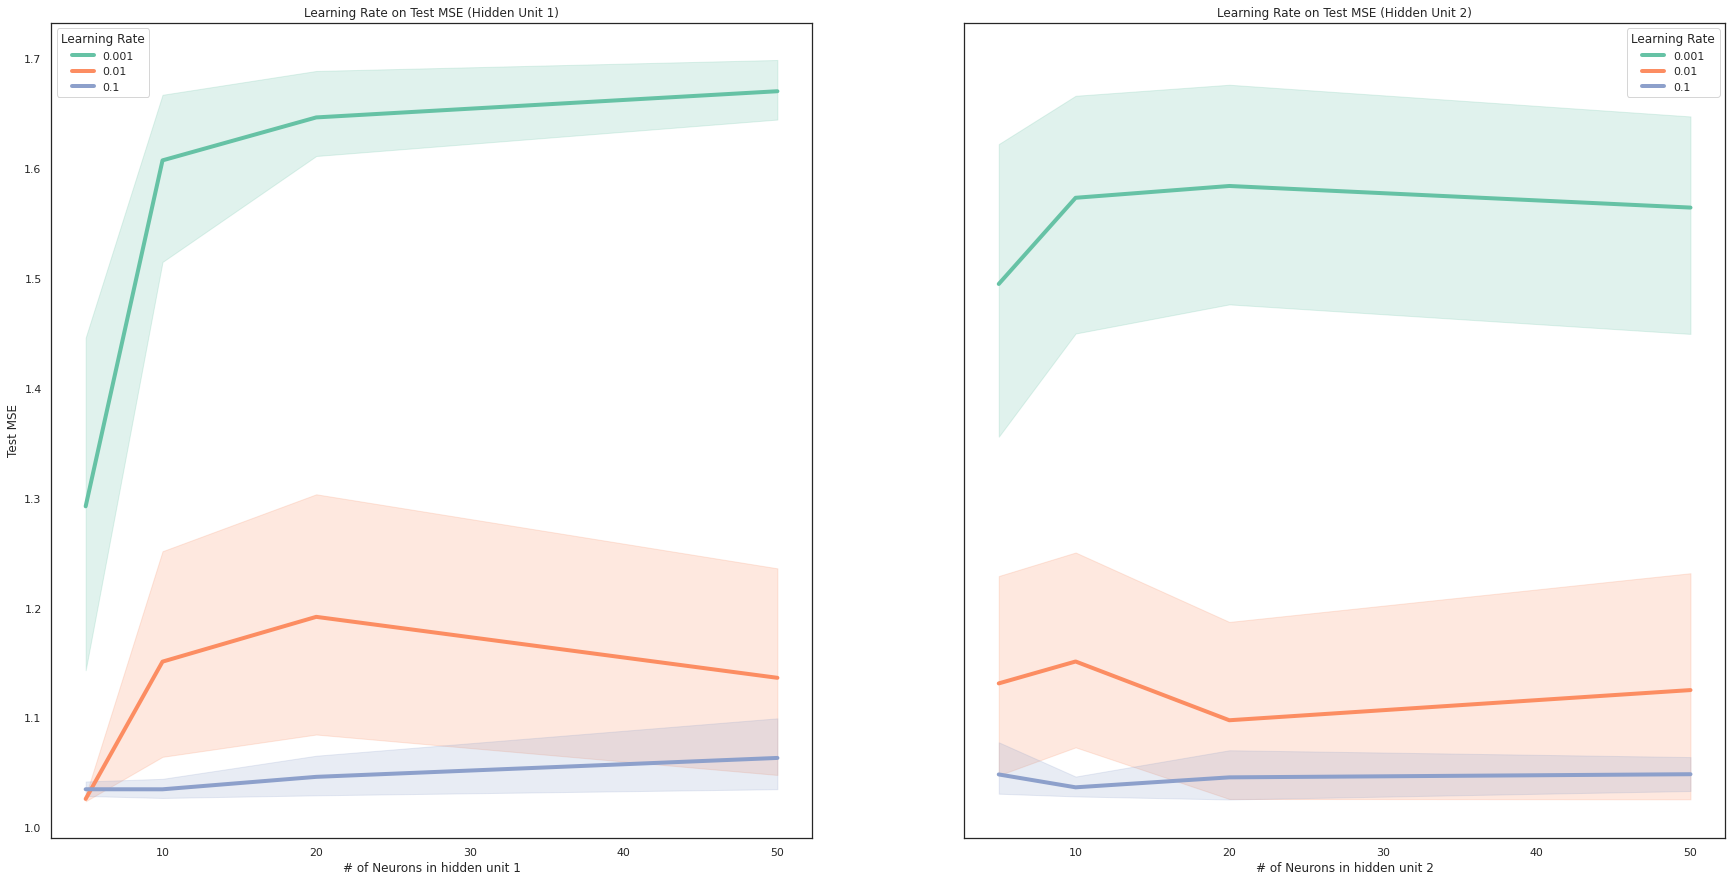

In [88]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30,15), sharey=True)

h1 = sns.lineplot(data=no_iden_relu, x='# of Neurons in hidden unit 1', y='Test MSE', hue='Learning Rate', ax = ax1, palette='Set2')
h2 = sns.lineplot(data=no_iden_relu, x='# of Neurons in hidden unit 2', y='Test MSE', hue='Learning Rate', ax = ax2, palette='Set2')
h1.set_title('Learning Rate on Test MSE (Hidden Unit 1)')
h2.set_title('Learning Rate on Test MSE (Hidden Unit 2)')
plt.show()

In [92]:
no_iden_relu['# of Neurons in hidden unit 1'] = no_iden_relu['# of Neurons in hidden unit 1'].astype(str)
no_iden_relu['# of Neurons in hidden unit 2'] = no_iden_relu['# of Neurons in hidden unit 2'].astype(str)

no_iden_relu['hiddenUnits'] = no_iden_relu['# of Neurons in hidden unit 1'].str.cat(no_iden_relu['# of Neurons in hidden unit 2'], sep=" ") 

no_iden_relu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Unnamed: 0,Activation,# of Neurons in hidden unit 1,# of Neurons in hidden unit 2,Alpha,Learning Rate,R^2,Train Loss,Test MSE,Time Taken,hiddenUnits
96,96,logistic,5,5,0.0001,0.100,-0.016603,0.498225,1.039856,0.48248,5 5
97,97,logistic,5,5,0.0001,0.010,-0.001726,0.497514,1.024639,0.85967,5 5
98,98,logistic,5,5,0.0001,0.001,-0.001198,0.497015,1.024127,0.40545,5 5
99,99,logistic,5,5,0.0010,0.100,-0.000037,0.498207,1.022911,0.41922,5 5
100,100,logistic,5,5,0.0010,0.010,-0.001293,0.497407,1.024209,0.40392,5 5
...,...,...,...,...,...,...,...,...,...,...,...
283,283,tanh,50,50,0.0001,0.010,0.000524,0.498395,1.023716,2.02995,50 50
284,284,tanh,50,50,0.0001,0.001,0.567453,0.185451,1.588182,11.07157,50 50
285,285,tanh,50,50,0.0010,0.100,-0.022248,0.533879,1.045631,1.97953,50 50
286,286,tanh,50,50,0.0010,0.010,-0.013378,0.503075,1.038489,2.41853,50 50


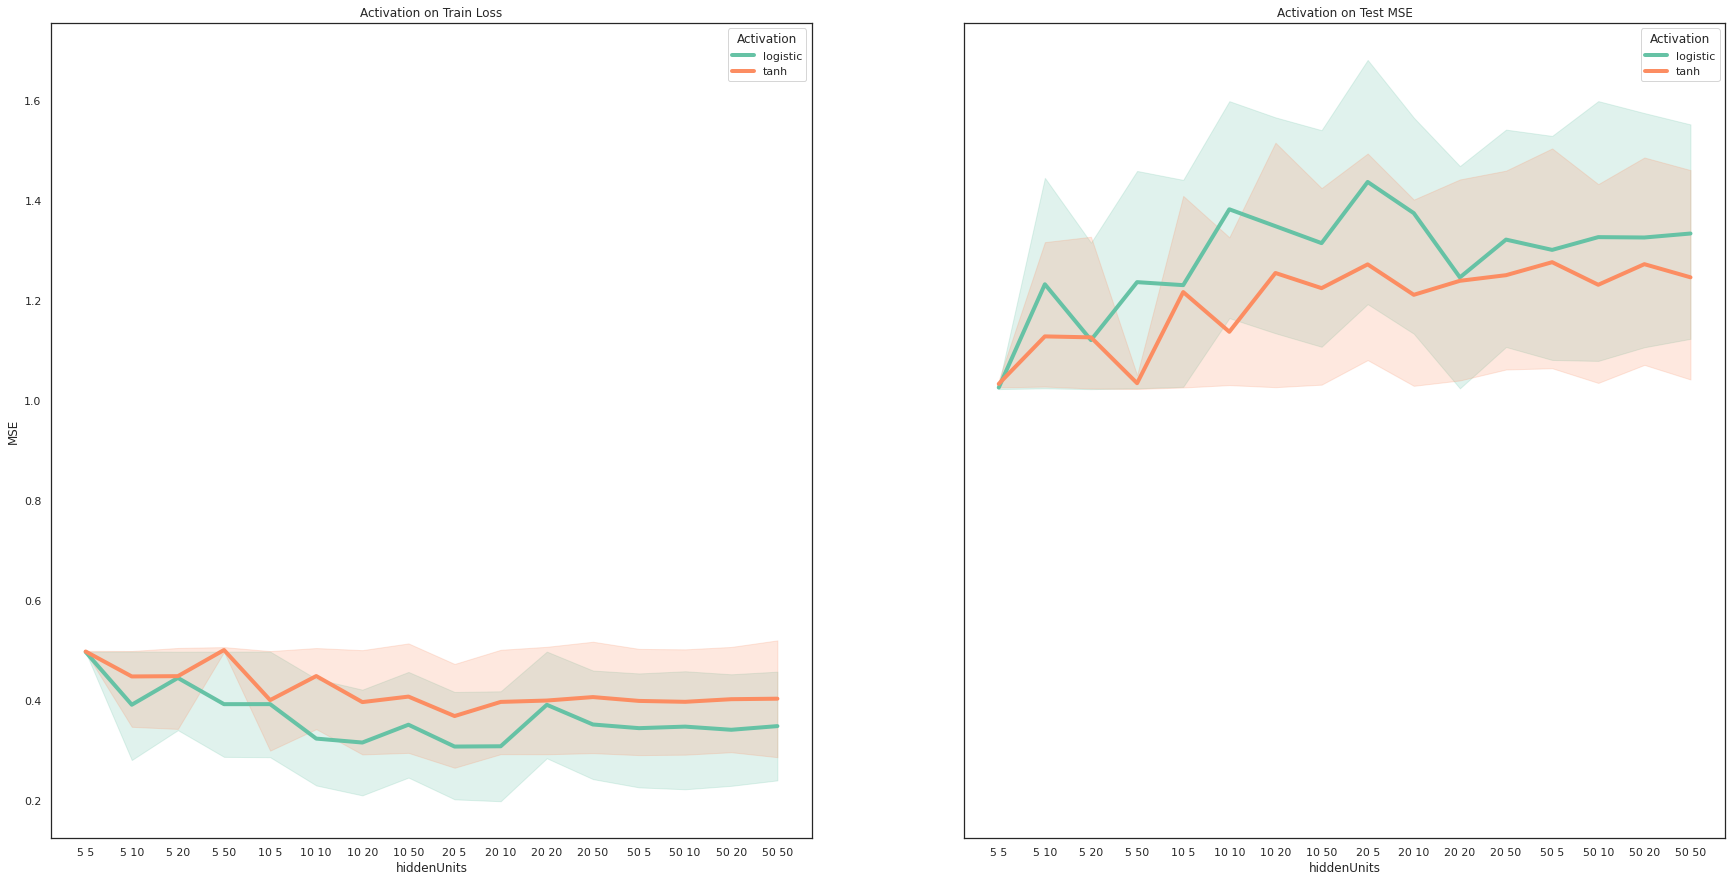

In [95]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30,15), sharey=True)
		
h1 = sns.lineplot(data=no_iden_relu, x='hiddenUnits', y='Train Loss', hue='Activation', ax = ax1, palette='Set2')
h2 = sns.lineplot(data=no_iden_relu, x='hiddenUnits', y='Test MSE', hue='Activation', ax = ax2, palette='Set2')

h1.set_title('Activation on Train Loss')
h2.set_title('Activation on Test MSE')

h1.set(ylabel='MSE')

plt.show()

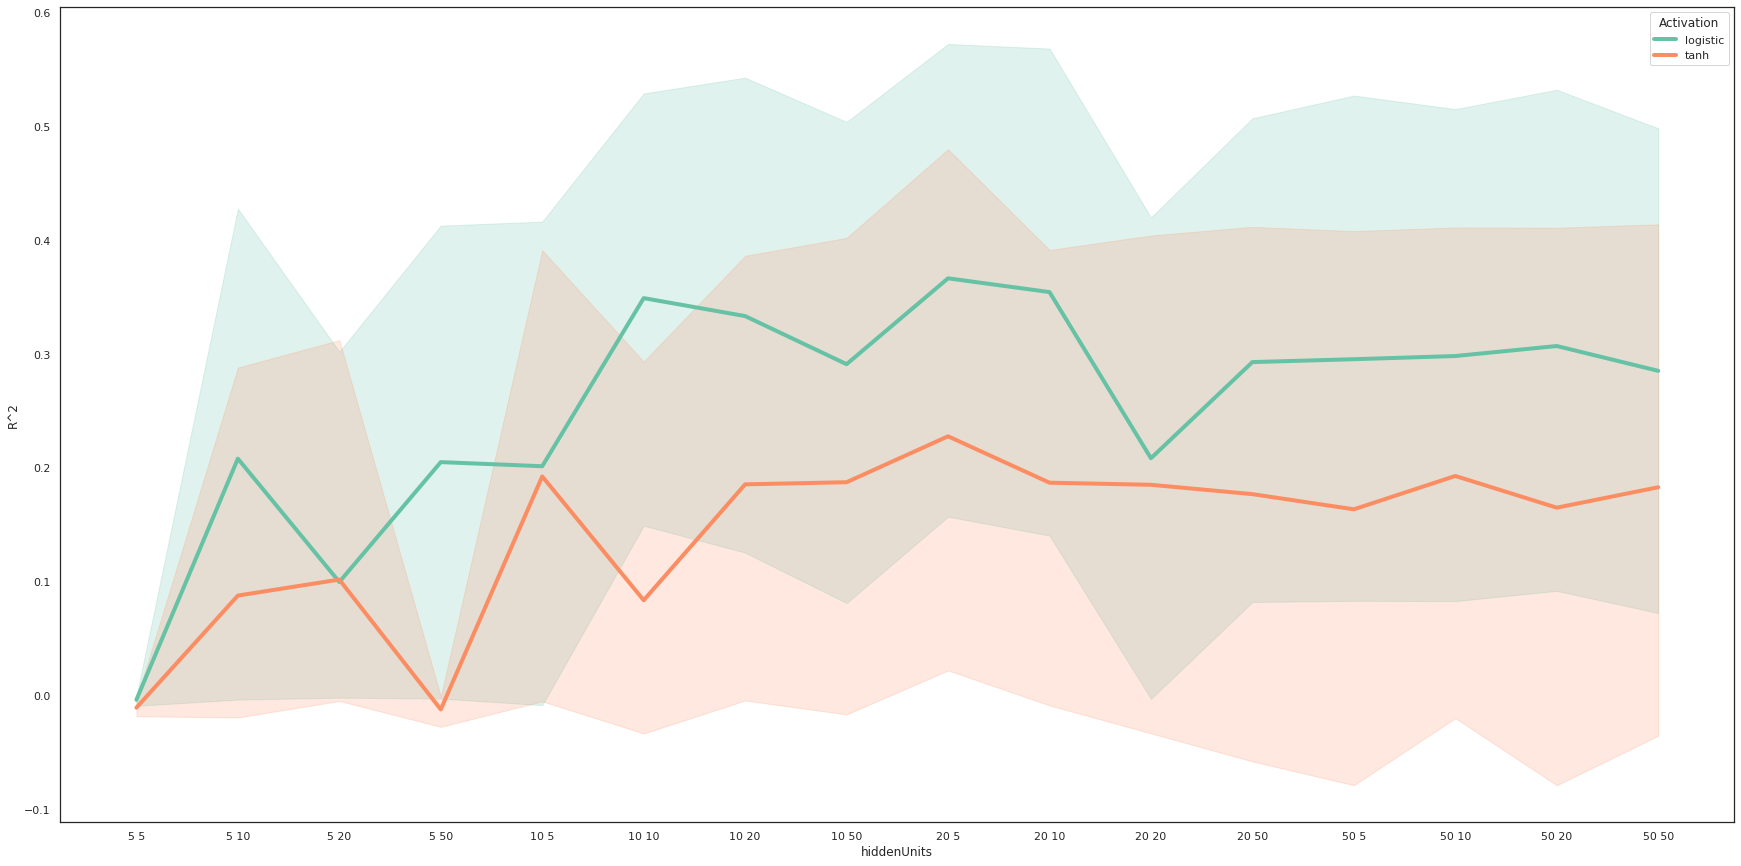

In [62]:
f,ax = plt.subplots(figsize=(30,15))
sns.lineplot(data=no_iden_relu, x='hiddenUnits', y='R^2', hue='Activation', palette='Set2')

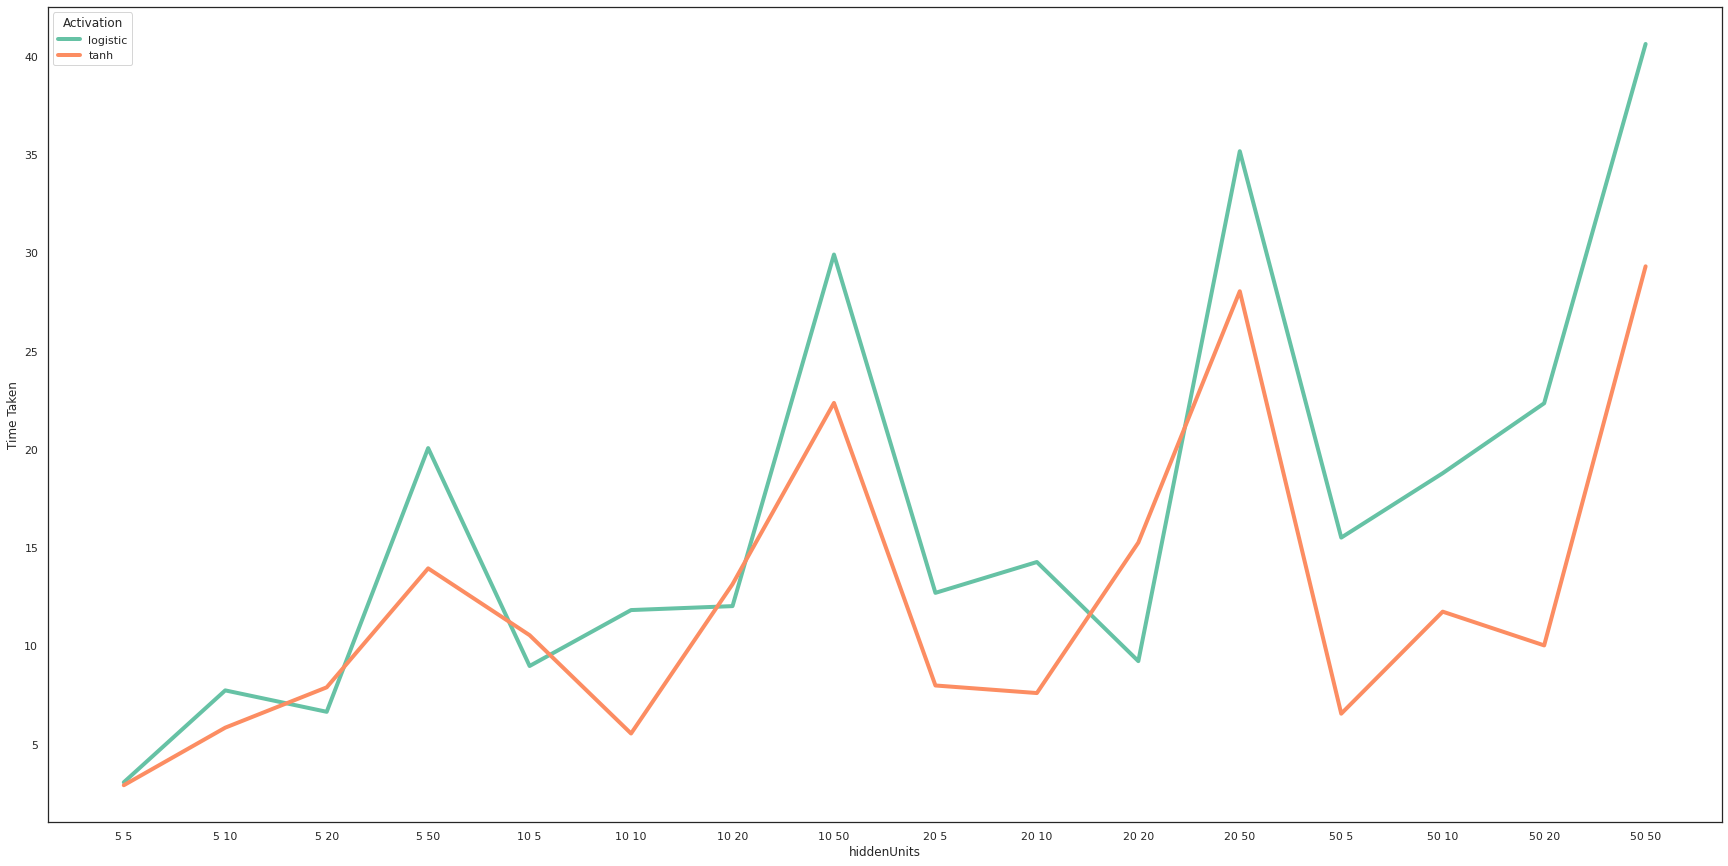

In [64]:
no_iden_relu = no_iden_relu.astype({'# of Neurons in hidden unit 1': int, '# of Neurons in hidden unit 2': int, 'Time Taken': float})
sum_agg = no_iden_relu.groupby(['# of Neurons in hidden unit 1', '# of Neurons in hidden unit 2', 'Activation','hiddenUnits'])['Time Taken'].sum().reset_index() 

sum_agg = sum_agg.sort_values(by=['# of Neurons in hidden unit 1', '# of Neurons in hidden unit 2'], ascending=True)

sum_agg

f,ax = plt.subplots(figsize=(30,15))
sns.lineplot(data=sum_agg, x='hiddenUnits', y='Time Taken', hue='Activation', palette='Set2')

# Classification

In [ ]:
cal_housing = fetch_california_housing()

X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = pd.DataFrame(cal_housing.target, columns=['MedHouseVal']) # columns=cal_housing.target_names

y[y['MedHouseVal'] <= 2] = 0

y[y['MedHouseVal'] > 2] = 1

y['MedHouseVal'].value_counts()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

activate = ['identity', 'logistic', 'tanh', 'relu']
hidden_1 = [5, 10, 20, 50]
hidden_2 = [5, 10, 20, 50]
alphas = [0.0001, 0.001]
learning_rates = [0.1, 0.01, 0.001]
for activation in activate:
    for h1 in hidden_1:
      for h2 in hidden_2:
        for alpha in alphas:
          for learning_rate in learning_rates:
            clf = MLPClassifier(solver='adam', hidden_layer_sizes=(h1, h2), activation=activation, 
                               alpha = alpha, learning_rate_init = learning_rate, max_iter=100000)
            clf.fit(X_train,y_train.values.ravel())
            yPred = clf.predict(X_test)
            print("Activation:",activation)
            print("Hidden Layer 1:",h1)
            print("Hidden Layer 2:",h2)
            print("Alpha:",alpha)
            print("Learning Rate:",learning_rate)
            print(classification_report(y_test,yPred))

Activation: identity
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83      2409
         1.0       0.87      0.55      0.67      1719

    accuracy                           0.78      4128
   macro avg       0.81      0.75      0.75      4128
weighted avg       0.80      0.78      0.77      4128

Activation: identity
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.89      0.49      0.63      2409
         1.0       0.56      0.92      0.70      1719

    accuracy                           0.67      4128
   macro avg       0.73      0.70      0.67      4128
weighted avg       0.75      0.67      0.66      4128

Activation: identity
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.84      2409
         1.0       0.88      0.57      0.69      1719

    accuracy                           0.79      4128
   macro avg       0.82      0.76      0.76      4128
weighted avg       0.81      0.79      0.78      4128

Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      2409
         1.0       0.79      0.76      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85      2409
         1.0       0.84      0.66      0.74      1719

    accuracy                           0.81      4128
   macro avg       0.82      0.79      0.79      4128
weighted avg       0.81      0.81      0.80      4128

Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81      2409
         1.0       0.72      0.84      0.77      1719

    accuracy                           0.80      4128
   macro avg       0.79      0.80      0.79      4128
weighted avg       0.81      0.80      0.80      4128

Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      2409
         1.0       0.83      0.72      0.77      1719

    accuracy                           0.82      4128
   macro avg       0.82      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84      2409
         1.0       0.89      0.58      0.70      1719

    accuracy                           0.79      4128
   macro avg       0.82      0.76      0.77      4128
weighted avg       0.81      0.79      0.78      4128

Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      2409
         1.0       0.79      0.77      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      2409
         1.0       0.86      0.66      0.75      1719

    accuracy                           0.81      4128
   macro avg       0.82      0.79      0.80      4128
weighted avg       0.82      0.81      0.81      4128

Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      2409
         1.0       0.86      0.66      0.75      1719

    accuracy                           0.81      4128
   macro avg       0.82      0.79      0.80      4128
weighted avg       0.82      0.81      0.81      4128

Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85      2409
         1.0       0.87      0.64      0.73      1719

    accuracy                           0.81      4128
   macro avg       0.83      0.78      0.79      4128
weighted avg       0.82      0.81      0.80      4128

Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85      2409
         1.0       0.88      0.60      0.71      1719

    accuracy                           0.80      4128
   macro avg       0.82      0.77      0.78      4128
weighted avg       0.81      0.80      0.79      4128

Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85      2409
         1.0       0.85      0.67      0.75      1719

    accuracy                           0.81      4128
   macro avg       0.82      0.79      0.80      4128
weighted avg       0.82      0.81      0.81      4128

Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      2409
         1.0       0.78      0.77      0.78      1719

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128

Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      2409
         1.0       0.79      0.77      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      2409
         1.0       0.74      0.81      0.78      1719

    accuracy                           0.80      4128
   macro avg       0.80      0.80      0.80      4128
weighted avg       0.81      0.80      0.80      4128

Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      2409
         1.0       0.84      0.68      0.75      1719

    accuracy                           0.81      4128
   macro avg       0.82      0.80      0.80      4128
weighted avg       0.82      0.81      0.81      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85      2409
         1.0       0.80      0.74      0.77      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.80      0.81      4128
weighted avg       0.82      0.82      0.81      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      2409
         1.0       0.79      0.78      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      2409
         1.0       0.78      0.77      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85      2409
         1.0       0.83      0.70      0.76      1719

    accuracy                           0.81      4128
   macro avg       0.82      0.80      0.80      4128
weighted avg       0.81      0.81      0.81      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85      2409
         1.0       0.86      0.63      0.73      1719

    accuracy                           0.80      4128
   macro avg       0.82      0.78      0.79      4128
weighted avg       0.81      0.80      0.80      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.87      0.74      0.80      2409
         1.0       0.70      0.85      0.77      1719

    accuracy                           0.79      4128
   macro avg       0.79      0.80      0.79      4128
weighted avg       0.80      0.79      0.79      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      2409
         1.0       0.81      0.74      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.82      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.84      2409
         1.0       0.88      0.60      0.71      1719

    accuracy                           0.80      4128
   macro avg       0.82      0.77      0.78      4128
weighted avg       0.81      0.80      0.79      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84      2409
         1.0       0.76      0.80      0.78      1719

    accuracy                           0.81      4128
   macro avg       0.80      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84      2409
         1.0       0.76      0.80      0.78      1719

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      2409
         1.0       0.80      0.70      0.75      1719

    accuracy                           0.80      4128
   macro avg       0.80      0.79      0.79      4128
weighted avg       0.80      0.80      0.80      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      2409
         1.0       0.79      0.77      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 20
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      2409
         1.0       0.80      0.76      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.82      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      2409
         1.0       0.78      0.79      0.79      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.82      0.82      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      2409
         1.0       0.77      0.80      0.79      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.82      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      2409
         1.0       0.86      0.65      0.74      1719

    accuracy                           0.81      4128
   macro avg       0.82      0.79      0.79      4128
weighted avg       0.82      0.81      0.80      4128

Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      2409
         1.0       0.83      0.67      0.74      1719

    accuracy                           0.80      4128
   macro avg       0.81      0.78      0.79      4128
weighted avg       0.81      0.80      0.80      4128

Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84      2409
         1.0       0.89      0.58      0.70      1719

    accuracy                           0.80      4128
   macro avg       0.82      0.76      0.77      4128
weighted avg       0.81      0.80      0.79      4128

Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      2409
         1.0       0.87      0.64      0.74      1719

    accuracy                           0.81      4128
   macro avg       0.83      0.79      0.80      4128
weighted avg       0.82      0.81      0.81      4128

Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      2409
         1.0       0.79      0.78      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.82      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      2409
         1.0       0.86      0.66      0.75      1719

    accuracy                           0.81      4128
   macro avg       0.83      0.79      0.80      4128
weighted avg       0.82      0.81      0.81      4128

Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      2409
         1.0       0.79      0.77      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: logistic
Hidden Layer 1: 50
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      2409
         1.0       0.81      0.75      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.82      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.67      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.63      0.50      0.37      4128
weighted avg       0.62      0.58      0.43      4128

Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2409
         1.0       0.42      1.00      0.59      1719

    accuracy                           0.42      4128
   macro avg       0.21      0.50      0.29      4128
weighted avg       0.17      0.42      0.24      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2409
         1.0       0.42      1.00      0.59      1719

    accuracy                           0.42      4128
   macro avg       0.21      0.50      0.29      4128
weighted avg       0.17      0.42      0.24      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.50      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.54      0.50      0.37      4128
weighted avg       0.55      0.58      0.43      4128

Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85      2409
         1.0       0.85      0.67      0.75      1719

    accuracy                           0.81      4128
   macro avg       0.82      0.79      0.80      4128
weighted avg       0.82      0.81      0.81      4128

Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 5
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      2409
         1.0       0.85      0.68      0.76      1719

    accuracy                           0.82      4128
   macro avg       0.82      0.80      0.80      4128
weighted avg       0.82      0.82      0.81      4128

Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85      2409
         1.0       0.85      0.68      0.75      1719

    accuracy                           0.82      4128
   macro avg       0.83      0.80      0.80      4128
weighted avg       0.82      0.82      0.81      4128

Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.86      0.07      0.13      2409
         1.0       0.43      0.98      0.60      1719

    accuracy                           0.45      4128
   macro avg       0.65      0.53      0.36      4128
weighted avg       0.68      0.45      0.33      4128

Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      2409
         1.0       0.77      0.79      0.78      1719

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.82      0.81      0.82      4128

Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 10
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      2409
         1.0       0.80      0.75      0.77      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      2409
         1.0       0.77      0.78      0.77      1719

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128

Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 20
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.50      0.00      0.01      1719

    accuracy                           0.58      4128
   macro avg       0.54      0.50      0.37      4128
weighted avg       0.55      0.58      0.43      4128

Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85      2409
         1.0       0.88      0.61      0.72      1719

    accuracy                           0.80      4128
   macro avg       0.82      0.77      0.78      4128
weighted avg       0.82      0.80      0.79      4128

Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 10
Hidden Layer 2: 50
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.0001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      2409
         1.0       0.79      0.76      0.78      1719

    accuracy                           0.82      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.82      0.82      0.82      4128

Activation: tanh
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 20
Hidden Layer 2: 5
Alpha: 0.001
Learning Rate: 0.001
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83      2409
         1.0       0.74      0.82      0.78      1719

    accuracy                           0.80      4128
   macro avg       0.80      0.81      0.80      4128
weighted avg       0.81      0.80      0.80      4128

Activation: tanh
Hidden Layer 1: 20
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.1
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2409
         1.0       0.42      1.00      0.59      1719

    accuracy                           0.42      4128
   macro avg       0.21      0.50      0.29      4128
weighted avg       0.17      0.42      0.24      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Activation: tanh
Hidden Layer 1: 20
Hidden Layer 2: 10
Alpha: 0.0001
Learning Rate: 0.01
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      2409
         1.0       0.00      0.00      0.00      1719

    accuracy                           0.58      4128
   macro avg       0.29      0.50      0.37      4128
weighted avg       0.34      0.58      0.43      4128



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
cal_housing = fetch_california_housing()

X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = pd.DataFrame(cal_housing.target, columns=['MedHouseVal']) # columns=cal_housing.target_names

y[y['MedHouseVal'] <= 2] = 0

y[y['MedHouseVal'] > 2] = 1

y['MedHouseVal'].value_counts()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

activate = ['identity', 'logistic', 'tanh', 'relu']
hidden_1 = [5, 10, 20, 50]
hidden_2 = [5, 10, 20, 50]
alphas = [0.0001, 0.001]
learning_rates = [0.1, 0.01, 0.001]

In [ ]:
active_name = []
hid1_name = []
hid2_name = []
alpha_name = []
learn_name = []
acc_name = []
prem_name = []
prew_name = []
recm_name = []
recw_name = []
f1m_name = []
f1w_name = []
time_name = []
activate = ['identity', 'logistic', 'tanh', 'relu']
hidden_1 = [5, 10, 20, 50]
hidden_2 = [5, 10, 20, 50]
alphas = [0.0001, 0.001]
learning_rates = [0.1, 0.01, 0.001]
for activation in activate:
    for h1 in hidden_1:
      for h2 in hidden_2:
        for alpha in alphas:
          for learning_rate in learning_rates:
            start = time.time()
            clf = MLPClassifier(solver='adam', hidden_layer_sizes=(h1, h2), activation=activation, 
                               alpha = alpha, learning_rate_init = learning_rate, max_iter=100000)
            clf.fit(X_train,y_train.values.ravel())
            yPred = clf.predict(X_test)
            active_name.append(activation)
            hid1_name.append(h1)
            hid2_name.append(h2)
            alpha_name.append(alpha)
            learn_name.append(learning_rate)
            acc_name.append(accuracy_score(y_test,yPred))
            prem_name.append(precision_score(y_test,yPred, average='macro'))
            prew_name.append(precision_score(y_test,yPred, average='weighted'))
            recm_name.append(recall_score(y_test,yPred, average='macro'))
            recw_name.append(recall_score(y_test,yPred, average='weighted'))
            f1m_name.append(f1_score(y_test,yPred, average='macro'))
            f1w_name.append(f1_score(y_test,yPred, average='weighted'))
            time_name.append(round(time.time() - start, 5))

finalc_results = pd.DataFrame(np.column_stack([active_name , hid1_name, hid2_name, alpha_name, 
                              learn_name, acc_name, prem_name, prew_name, recm_name,
                              recw_name,f1m_name,f1w_name,time_name]), 
                             columns=['Activation', '# of Neurons in hidden unit 1', '# of Neurons in hidden unit 2',
                                      'Alpha', 'Learning Rate', 'Accuracy Score', 'Macro Precision', 'Weighted Precision', 'Macro Recall',
                                      'Weighted Recall','Macro F1','Weighted F1','Time Taken'])



finalc_results.to_csv('../data/raw/data_assign_clf')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

In [12]:
clf_result = pd.read_csv('../data/raw/data_assign_clf')
clf_result.head()

,Unnamed: 0,Activation,# of Neurons in hidden unit 1,# of Neurons in hidden unit 2,Alpha,Learning Rate,Accuracy Score,Macro Precision,Weighted Precision,Macro Recall,Weighted Recall,Macro F1,Weighted F1,Time Taken
0,0,identity,5,5,0.0001,0.100,0.816134,0.819367,0.817561,0.801141,0.816134,0.806633,0.813445,1.17050
1,1,identity,5,5,0.0001,0.010,0.468992,0.664341,0.699820,0.539515,0.468992,0.390910,0.356254,0.54266
2,2,identity,5,5,0.0001,0.001,0.751453,0.804905,0.789971,0.711602,0.751453,0.713527,0.730091,1.29560
3,3,identity,5,5,0.0010,0.100,0.664486,0.799874,0.773551,0.602121,0.664486,0.559537,0.593704,1.55381
4,4,identity,5,5,0.0010,0.010,0.787791,0.807775,0.800117,0.761440,0.787791,0.768768,0.779308,0.73121


In [13]:
clf_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     384 non-null    int64  
 1   Activation                     384 non-null    object 
 2   # of Neurons in hidden unit 1  384 non-null    int64  
 3   # of Neurons in hidden unit 2  384 non-null    int64  
 4   Alpha                          384 non-null    float64
 5   Learning Rate                  384 non-null    float64
 6   Accuracy Score                 384 non-null    float64
 7   Macro Precision                384 non-null    float64
 8   Weighted Precision             384 non-null    float64
 9   Macro Recall                   384 non-null    float64
 10  Weighted Recall                384 non-null    float64
 11  Macro F1                       384 non-null    float64
 12  Weighted F1                    384 non-null    flo

In [14]:
clf_result['# of Neurons in hidden unit 1'] = clf_result['# of Neurons in hidden unit 1'].astype(str)
clf_result['# of Neurons in hidden unit 2'] = clf_result['# of Neurons in hidden unit 2'].astype(str)

clf_result['hiddenUnits'] = clf_result['# of Neurons in hidden unit 1'].str.cat(clf_result['# of Neurons in hidden unit 2'], sep=" ") 

clf_result

,Unnamed: 0,Activation,# of Neurons in hidden unit 1,# of Neurons in hidden unit 2,Alpha,Learning Rate,Accuracy Score,Macro Precision,Weighted Precision,Macro Recall,Weighted Recall,Macro F1,Weighted F1,Time Taken,hiddenUnits
0,0,identity,5,5,0.0001,0.100,0.816134,0.819367,0.817561,0.801141,0.816134,0.806633,0.813445,1.17050,5 5
1,1,identity,5,5,0.0001,0.010,0.468992,0.664341,0.699820,0.539515,0.468992,0.390910,0.356254,0.54266,5 5
2,2,identity,5,5,0.0001,0.001,0.751453,0.804905,0.789971,0.711602,0.751453,0.713527,0.730091,1.29560,5 5
3,3,identity,5,5,0.0010,0.100,0.664486,0.799874,0.773551,0.602121,0.664486,0.559537,0.593704,1.55381,5 5
4,4,identity,5,5,0.0010,0.010,0.787791,0.807775,0.800117,0.761440,0.787791,0.768768,0.779308,0.73121,5 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,relu,50,50,0.0001,0.010,0.818556,0.825648,0.822053,0.801257,0.818556,0.807836,0.815049,7.88618,50 50
380,380,relu,50,50,0.0001,0.001,0.625000,0.715479,0.744863,0.668128,0.625000,0.614477,0.604355,4.59343,50 50
381,381,relu,50,50,0.0010,0.100,0.579457,0.289729,0.335771,0.500000,0.579457,0.366871,0.425172,1.42301,50 50
382,382,relu,50,50,0.0010,0.010,0.814922,0.810064,0.817725,0.814867,0.814922,0.811749,0.815633,5.22471,50 50


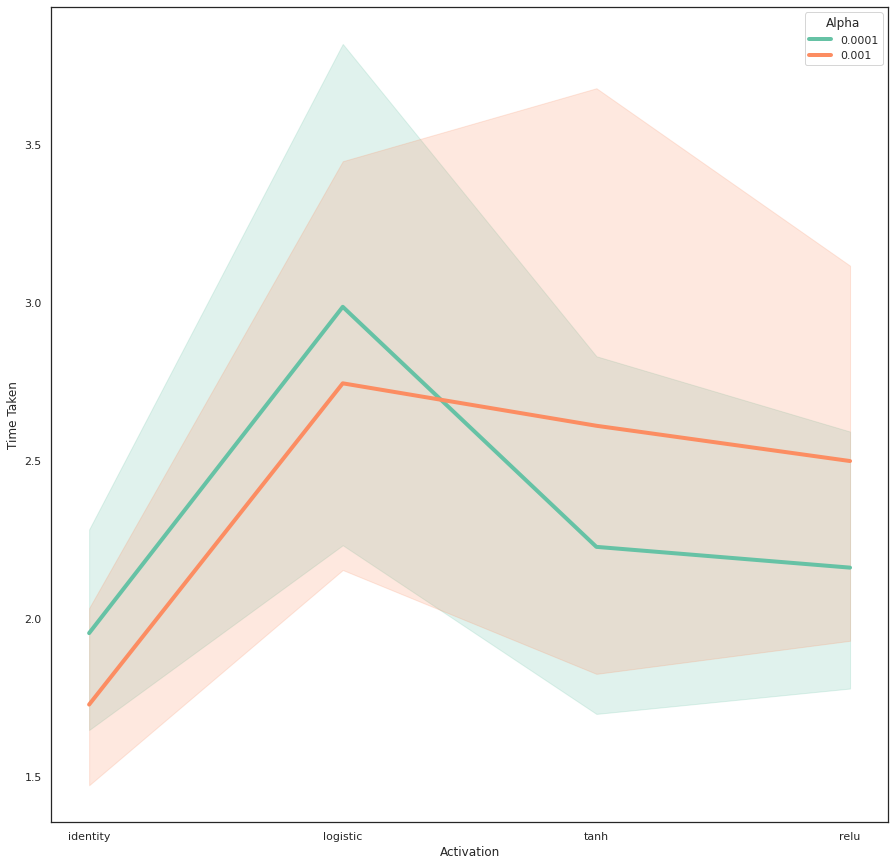

In [35]:
f,ax = plt.subplots(figsize=(15,15))

sns.lineplot(data=clf_result, x='Activation', y='Time Taken', hue='Alpha', palette='Set2')

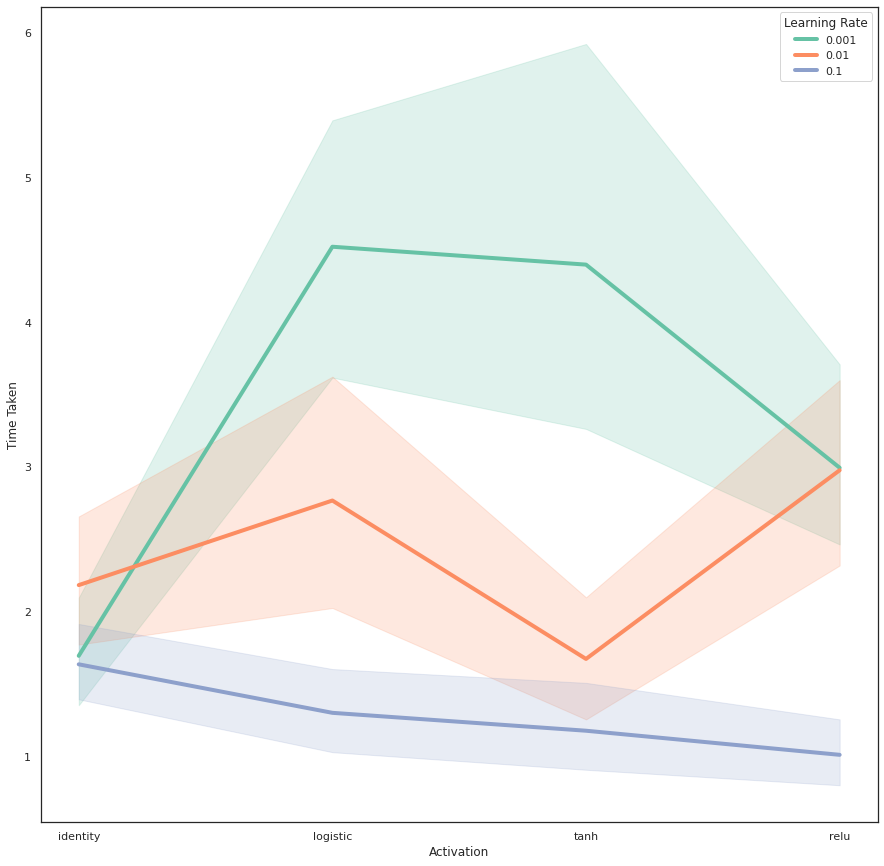

In [36]:
f,ax = plt.subplots(figsize=(15,15))
sns.lineplot(data=clf_result, x='Activation', y='Time Taken', hue='Learning Rate', palette='Set2')

In [37]:
max_macro_pre = np.max(clf_result.groupby(['Activation','hiddenUnits'])['Macro Precision'].mean().reset_index() )['Macro Precision']
max_macro_f1 = np.max(clf_result.groupby(['Activation','hiddenUnits'])['Macro F1'].mean().reset_index() )['Macro F1']
max_macro_recall = np.max(clf_result.groupby(['Activation','hiddenUnits'])['Macro Recall'].mean().reset_index() )['Macro Recall']
max_accuracy_score = np.max(clf_result.groupby(['Activation','hiddenUnits'])['Accuracy Score'].mean().reset_index() )['Accuracy Score']

macro_list = ['Macro Precision','Macro F1','Macro Recall','Accuracy Score']
max_macro_list = [max_macro_pre,max_macro_f1,max_macro_recall,max_accuracy_score]
max_hidden_list = []

a = clf_result.groupby(['Activation','hiddenUnits']).mean().astype(float)
a.dtypes

for index, i in enumerate(macro_list):
  macro_var = a[abs(a[i] - max_macro_list[index]) < 1e-5][i]
  macro_var = macro_var.reset_index()
  max_hidden_list.append(macro_var['hiddenUnits'][0])

max_hidden_list



['20 5', '20 10', '20 10', '20 5']

<class 'matplotlib.axes._subplots.AxesSubplot'>


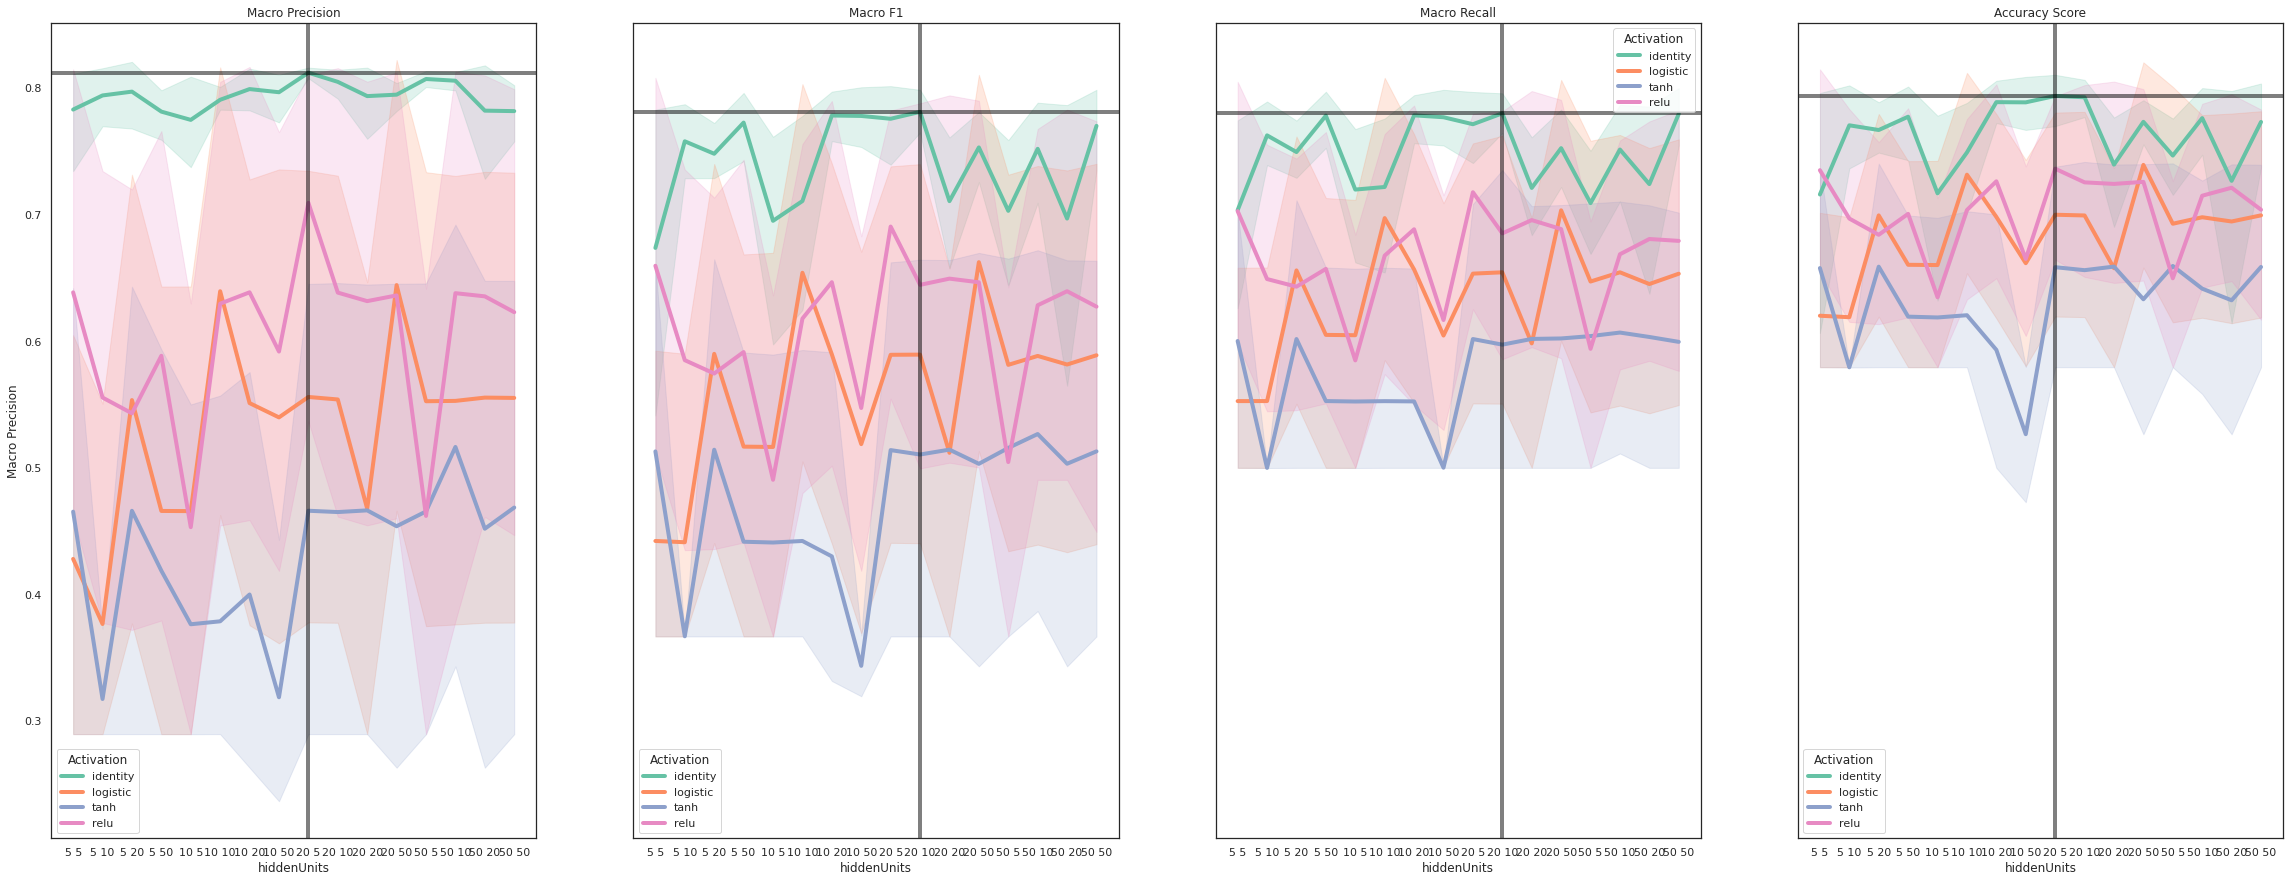

In [38]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(40,15), sharey=True)
		
h1 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Macro Precision', hue='Activation', ax = ax1, palette='Set2')
h2 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Macro F1', hue='Activation', ax = ax2, palette='Set2')
h3 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Macro Recall', hue='Activation', ax = ax3, palette='Set2')
h4 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Accuracy Score', hue='Activation', ax = ax4, palette='Set2')

print(type(h1))
h1.axhline(max_macro_pre, color='black', alpha=0.5)
h1.axvline(max_hidden_list[0], color='black', alpha=0.5)

h2.axhline(max_macro_f1, color='black', alpha=0.5)
h2.axvline(max_hidden_list[1], color='black', alpha=0.5)

h3.axhline(max_macro_recall, color='black', alpha=0.5)
h3.axvline(max_hidden_list[2], color='black', alpha=0.5)

h4.axhline(max_accuracy_score, color='black', alpha=0.5)
h4.axvline(max_hidden_list[3], color='black', alpha=0.5)

h1.set_title('Macro Precision')
h2.set_title('Macro F1')
h3.set_title('Macro Recall')
h4.set_title('Accuracy Score')

plt.show()

In [39]:
max_macro_pre = np.max(clf_result.groupby(['Alpha','hiddenUnits'])['Macro Precision'].mean().reset_index() )['Macro Precision']
max_macro_f1 = np.max(clf_result.groupby(['Alpha','hiddenUnits'])['Macro F1'].mean().reset_index() )['Macro F1']
max_macro_recall = np.max(clf_result.groupby(['Alpha','hiddenUnits'])['Macro Recall'].mean().reset_index() )['Macro Recall']
max_accuracy_score = np.max(clf_result.groupby(['Alpha','hiddenUnits'])['Accuracy Score'].mean().reset_index() )['Accuracy Score']

macro_list = ['Macro Precision','Macro F1','Macro Recall','Accuracy Score']
max_macro_list = [max_macro_pre,max_macro_f1,max_macro_recall,max_accuracy_score]
max_hidden_list = []

alpha_var = clf_result.groupby(['Alpha','hiddenUnits']).mean().astype(float)
alpha_var.dtypes

for index, i in enumerate(macro_list):
  macro_var = alpha_var[abs(alpha_var[i] - max_macro_list[index]) < 1e-5][i]
  macro_var = macro_var.reset_index()
  max_hidden_list.append(macro_var['hiddenUnits'][0])

max_hidden_list



['20 5', '20 5', '20 5', '20 5']

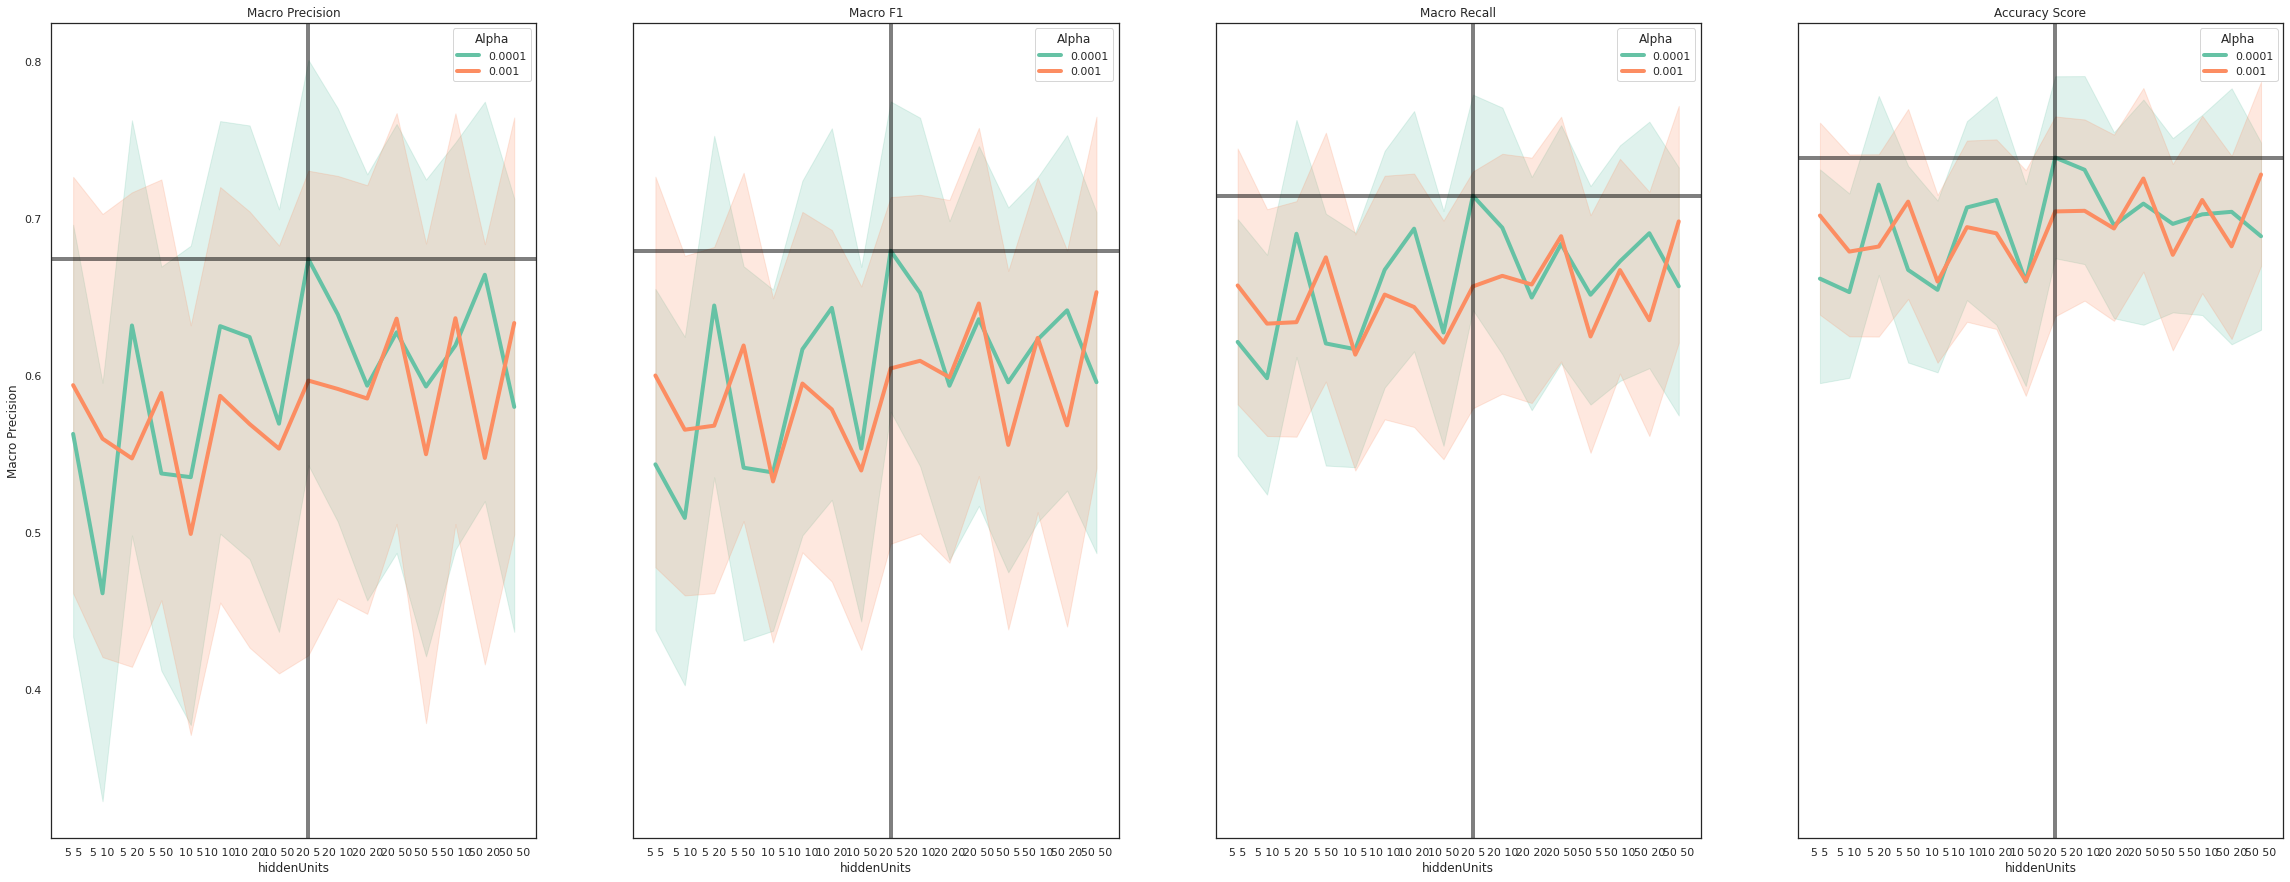

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(40,15), sharey=True)
		
h1 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Macro Precision', hue='Alpha', ax = ax1, palette='Set2')
h2 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Macro F1', hue='Alpha', ax = ax2, palette='Set2')
h3 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Macro Recall', hue='Alpha', ax = ax3, palette='Set2')
h4 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Accuracy Score', hue='Alpha', ax = ax4, palette='Set2')

h1.axhline(max_macro_pre, color='black', alpha=0.5)
h1.axvline(max_hidden_list[0], color='black', alpha=0.5)

h2.axhline(max_macro_f1, color='black', alpha=0.5)
h2.axvline(max_hidden_list[1], color='black', alpha=0.5)

h3.axhline(max_macro_recall, color='black', alpha=0.5)
h3.axvline(max_hidden_list[2], color='black', alpha=0.5)

h4.axhline(max_accuracy_score, color='black', alpha=0.5)
h4.axvline(max_hidden_list[3], color='black', alpha=0.5)

h1.set_title('Macro Precision')
h2.set_title('Macro F1')
h3.set_title('Macro Recall')
h4.set_title('Accuracy Score')

plt.show()

In [42]:
max_macro_pre = np.max(clf_result.groupby(['Learning Rate','hiddenUnits'])['Macro Precision'].mean().reset_index() )['Macro Precision']
max_macro_f1 = np.max(clf_result.groupby(['Learning Rate','hiddenUnits'])['Macro F1'].mean().reset_index() )['Macro F1']
max_macro_recall = np.max(clf_result.groupby(['Learning Rate','hiddenUnits'])['Macro Recall'].mean().reset_index() )['Macro Recall']
max_accuracy_score = np.max(clf_result.groupby(['Learning Rate','hiddenUnits'])['Accuracy Score'].mean().reset_index() )['Accuracy Score']

macro_list = ['Macro Precision','Macro F1','Macro Recall','Accuracy Score']
max_macro_list = [max_macro_pre,max_macro_f1,max_macro_recall,max_accuracy_score]
max_hidden_list = []

lr_var = clf_result.groupby(['Learning Rate','hiddenUnits']).mean().astype(float)
lr_var.dtypes

for index, i in enumerate(macro_list):
  macro_var = lr_var[abs(lr_var[i] - max_macro_list[index]) < 1e-5][i]
  macro_var = macro_var.reset_index()
  max_hidden_list.append(macro_var['hiddenUnits'][0])

max_hidden_list



['20 5', '20 5', '20 5', '20 5']

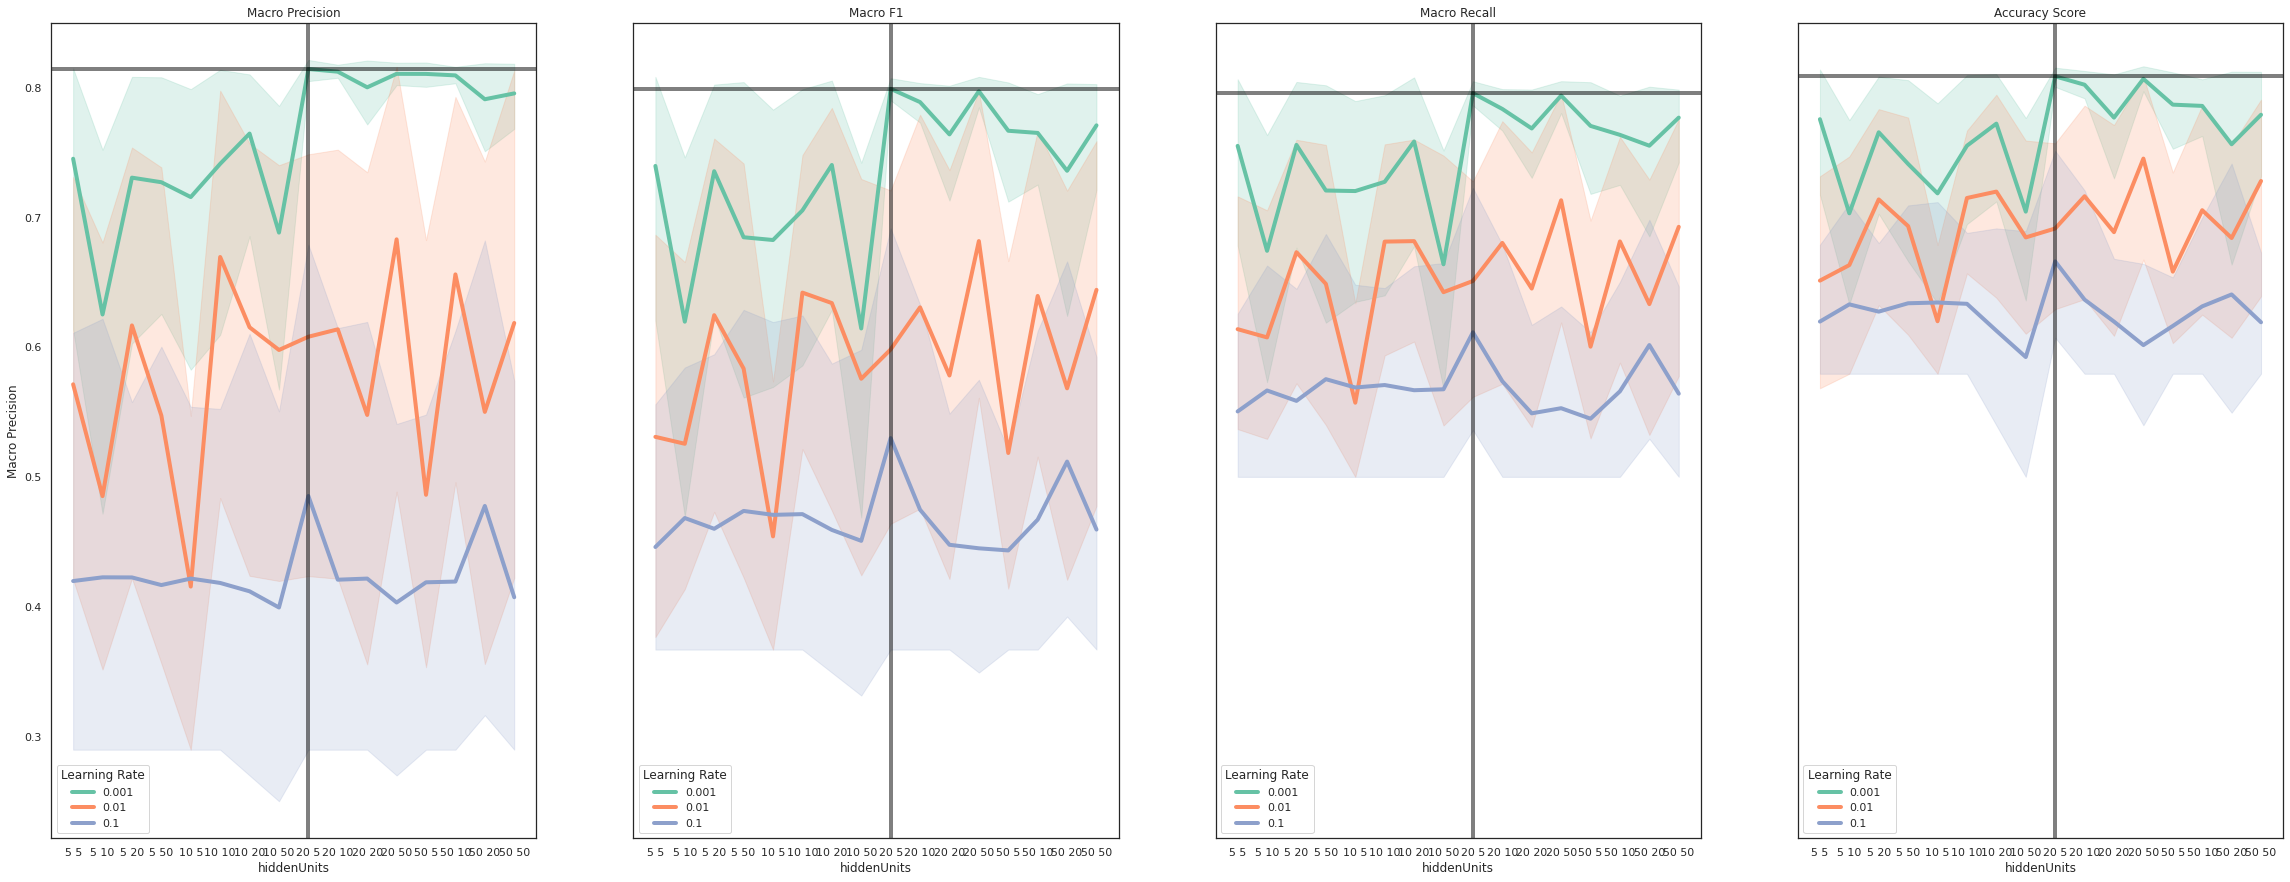

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(40,15), sharey=True)
		
h1 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Macro Precision', hue='Learning Rate', ax = ax1, palette='Set2')
h2 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Macro F1', hue='Learning Rate', ax = ax2, palette='Set2')
h3 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Macro Recall', hue='Learning Rate', ax = ax3, palette='Set2')
h4 = sns.lineplot(data=clf_result, x='hiddenUnits', y='Accuracy Score', hue='Learning Rate', ax = ax4, palette='Set2')

h1.axhline(max_macro_pre, color='black', alpha=0.5)
h1.axvline(max_hidden_list[0], color='black', alpha=0.5)

h2.axhline(max_macro_f1, color='black', alpha=0.5)
h2.axvline(max_hidden_list[1], color='black', alpha=0.5)

h3.axhline(max_macro_recall, color='black', alpha=0.5)
h3.axvline(max_hidden_list[2], color='black', alpha=0.5)

h4.axhline(max_accuracy_score, color='black', alpha=0.5)
h4.axvline(max_hidden_list[3], color='black', alpha=0.5)

h1.set_title('Macro Precision')
h2.set_title('Macro F1')
h3.set_title('Macro Recall')
h4.set_title('Accuracy Score')

plt.show()